In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
#import csv
df = pd.read_csv('2019.csv')

#drop 'unneccessary' columns

df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt',
         'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb',
         'GS', 'Age', 'Tgt', 'Y/A', 'Att', 'Att.1', 'Cmp', 'Y/R'], axis=1, inplace=True)

#Fix name formatting
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#Rename Columns
df.rename({
    'TD': 'PassingTD',
    'TD.1' : 'RushingTD',
    'TD.2' : 'ReceivingTD',
    'TD.3' : 'TotalTD',
    'Yds'  : 'PassingYDs',
    'Yds.1' : 'RushingYDs',
    'Yds.2' : 'ReceivingYDs',
}, axis=1, inplace=True)

#Make sure to put paranthesis if you break lines
df['FantasyPoints'] = (df['PassingYDs']*0.04 + df['PassingTD']*4 - df['Int']*2 + df['RushingYDs']*0.1
                      + df['RushingTD']*6 + df['Rec']*1 + df['ReceivingYDs']*0.1 + df['ReceivingTD']*6 - df['FL']*2)

df['FantasyPoints/GM'] = df['FantasyPoints']/df['G']

df = df[['Tm', 'FantPos', 'FantasyPoints', 'FantasyPoints/GM']]

df = df[df['Tm'] != '2TM']
df = df[df['Tm'] != '3TM']

#seperate dataframes based off position

#seperate df based on position
rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']


In [33]:
def get_top_n_players(df, n):
    return df.groupby('Tm').apply(lambda x: x.nlargest(n,
        ['FantasyPoints']).min()).reset_index(drop=True)

In [34]:
qb_df = get_top_n_players(qb_df, 1)
rb1_df = get_top_n_players(rb_df, 1)
rb2_df = get_top_n_players(rb_df, 2)
wr1_df = get_top_n_players(wr_df, 1)
wr2_df = get_top_n_players(wr_df, 2)
wr3_df = get_top_n_players(wr_df, 3)
te_df = get_top_n_players(te_df, 1)

In [35]:
new_names = {
    'QB1':qb_df,
    'RB1':rb1_df,
    'RB2':rb2_df,
    'WR1':wr1_df,
    'WR2':wr2_df,
    'WR3':wr3_df,
    'TE1':te_df
}

In [36]:
for name, new_df in new_names.items():
    new_df.rename({'FantasyPoints/GM': name}, axis=1, inplace=True)
    new_df.drop(['FantPos', 'FantasyPoints'], axis=1, inplace=True)
    new_df.set_index('Tm', inplace=True)
    
df = pd.concat([qb_df, te_df, rb1_df, rb2_df, wr1_df, wr2_df, wr3_df], axis=1)

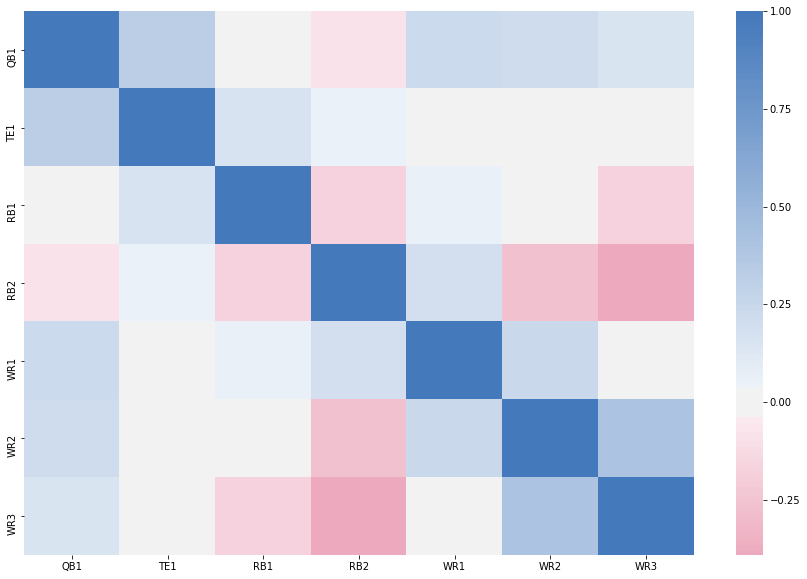

In [37]:
corrMatrix = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

cmap = sns.diverging_palette(0, 250, as_cmap=True)
vizCorrMatrix = sns.heatmap(corrMatrix,cmap=cmap, center=0)